In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import numpy as np

In [44]:
folderoots = "../data/processed/ignored_files/paper/grid/auc_table_growth.json"
df_growth = pd.read_json(folderoots)
mask_ord = df_growth["Order"] == "additive"
mask_met = df_growth["Metric optimized"] == "random"
xx_mean = df_growth[mask_ord & mask_met]["AUC of Directness"].mean()
xx_std = df_growth[mask_ord & mask_met]["AUC of Directness"].std()
yy_mean = df_growth[mask_ord & mask_met]["AUC of Coverage"].mean()
yy_std = df_growth[mask_ord & mask_met]["AUC of Coverage"].std()
xx_max = df_growth[mask_ord]["AUC of Coverage"].max()
yy_max = df_growth[mask_ord]["AUC of Directness"].max()

In [45]:
print(
    f"Mean AUC of Coverage is {xx_mean} with std of {xx_std}. To reach the max AUC of Coverage of {xx_max}, we need {round((xx_max-xx_mean)/xx_std)} deviations. For an normal distribution, it corresponds to 1 out of {round(1/scipy.stats.norm.sf((xx_max-xx_mean)/xx_std)):.0e} trials on the Pareto Front."
)

Mean AUC of Coverage is 0.6686493035869999 with std of 0.0187470961234153. To reach the max AUC of Coverage of 0.8773430253000001, we need 11 deviations. For an normal distribution, it corresponds to 1 out of 2e+28 trials on the Pareto Front.


In [46]:
print(
    f"Mean AUC of Directness is {yy_mean} with std of {yy_std}. To reach the max AUC of Directness of {yy_max}, we need {round((yy_max-yy_mean)/yy_std)} deviations. For an normal distribution, it corresponds to 1 out of {round(1/scipy.stats.norm.sf((yy_max-yy_mean)/yy_std)):.0e} trials on the Pareto Front."
)

Mean AUC of Directness is 0.749464559685 with std of 0.015406175545124546. To reach the max AUC of Directness of 0.8439580595, we need 6 deviations. For an normal distribution, it corresponds to 1 out of 2e+09 trials on the Pareto Front.


Probability of being normal is 0.044%


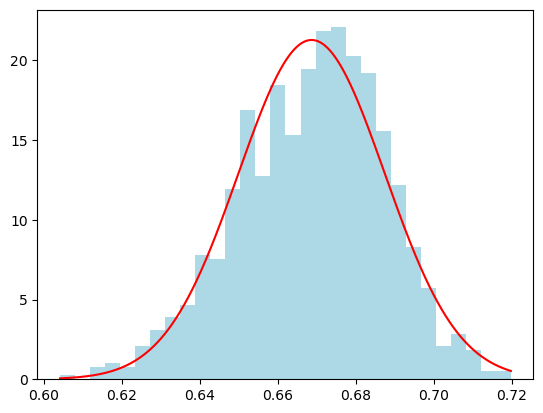

In [81]:
fig, ax = plt.subplots()
x = np.linspace(
    df_growth[mask_ord & mask_met]["AUC of Directness"].min(),
    df_growth[mask_ord & mask_met]["AUC of Directness"].max(),
    num=1000,
)
ax.plot(x, scipy.stats.norm.pdf(x, loc=xx_mean, scale=xx_std), color="red")
ax.hist(
    df_growth[mask_ord & mask_met]["AUC of Directness"].values,
    bins=30,
    color="lightblue",
    density=True,
)
stat, p = scipy.stats.shapiro(
    df_growth[mask_ord & mask_met]["AUC of Directness"].values
)
print(f"Probability of being normal is {100*p:.2}%")

Probability of being normal is 89.20%


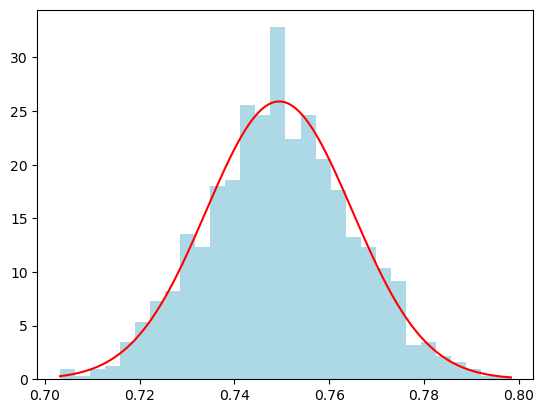

In [82]:
fig, ax = plt.subplots()
x = np.linspace(
    df_growth[mask_ord & mask_met]["AUC of Coverage"].min(),
    df_growth[mask_ord & mask_met]["AUC of Coverage"].max(),
    num=1000,
)
ax.plot(x, scipy.stats.norm.pdf(x, loc=yy_mean, scale=yy_std), color="red")
ax.hist(
    df_growth[mask_ord & mask_met]["AUC of Coverage"].values,
    bins=30,
    color="lightblue",
    density=True,
)
stat, p = scipy.stats.shapiro(df_growth[mask_ord & mask_met]["AUC of Coverage"].values)
print(f"Probability of being normal is {100*p:.2f}%")